In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
import pandas as pd
import numpy as np
import io
import sklearn 
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [173]:
df = pd.read_csv('/content/drive/MyDrive/DATA/4. 1+2+3_DFEDTAR_data.csv')
#필요없는 열 제거 
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("DATE", axis=1)
#형태 확인
df,df.shape

(      DFEDTAR  NASDAQCOM  BAMLH0A0HYM2  ...  USD/KRW  USD/EUR  USD/CNY
 0        4.75    2208.05          5.63  ...  1186.25   0.8455   8.2793
 1        4.75    2208.05          5.63  ...  1186.25   0.8455   8.2793
 2        4.75    2208.05          5.63  ...  1186.25   0.8455   8.2793
 3        4.75    2208.05          5.63  ...  1186.25   0.8455   8.2793
 4        4.75    2251.27          5.57  ...  1164.50   0.8501   8.2795
 ...       ...        ...           ...  ...      ...      ...      ...
 8186     0.25   13748.74          3.34  ...  1106.58   0.8177   6.3688
 8187     0.25   13736.48          3.33  ...  1108.38   0.8187   6.3796
 8188     0.25   13756.33          3.31  ...  1110.92   0.8188   6.3805
 8189     0.25   13614.51          3.28  ...  1116.46   0.8245   6.4036
 8190     0.25   13614.51          3.28  ...  1110.52   0.8218   6.3945
 
 [8191 rows x 15 columns], (8191, 15))

In [174]:
#df = df.set_index('DATE')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DFEDTAR       8191 non-null   float64
 1   NASDAQCOM     8191 non-null   float64
 2   BAMLH0A0HYM2  8191 non-null   float64
 3   HSN1F         8191 non-null   float64
 4   UMCSENT       8191 non-null   float64
 5   UNRATE        8191 non-null   float64
 6   M2            8191 non-null   float64
 7   ICSA          8191 non-null   float64
 8   NG            8191 non-null   float64
 9   ZG            8191 non-null   float64
 10  ZI            8191 non-null   float64
 11  HG            8191 non-null   float64
 12  USD/KRW       8191 non-null   float64
 13  USD/EUR       8191 non-null   float64
 14  USD/CNY       8191 non-null   float64
dtypes: float64(15)
memory usage: 960.0 KB


In [176]:
# Numerical Features

num_columns = [c for c, t in zip(df.dtypes.index, df.dtypes) if t == 'float64']
num_columns

['DFEDTAR',
 'NASDAQCOM',
 'BAMLH0A0HYM2',
 'HSN1F',
 'UMCSENT',
 'UNRATE',
 'M2',
 'ICSA',
 'NG',
 'ZG',
 'ZI',
 'HG',
 'USD/KRW',
 'USD/EUR',
 'USD/CNY']

#**정규화 및 모델링**

정규화

In [137]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[num_columns] = scaler.fit_transform(df[num_columns])
# df[num_columns]

,DFEDTAR,NASDAQCOM,BAMLH0A0HYM2,HSN1F,UMCSENT,UNRATE,M2,ICSA,NG,ZG,ZI,HG,USD/KRW,USD/EUR,USD/CNY
0,1.476892,-0.646109,-0.025829,0.560273,1.395258,-0.826073,-1.326946,-0.174485,-1.030318,-1.328004,-1.190292,-1.585160,0.559719,-0.031200,1.297171
1,1.476892,-0.646109,-0.025829,0.560273,1.395258,-0.826073,-1.326946,-0.174485,-1.030318,-1.328004,-1.190292,-1.585160,0.559719,-0.031200,1.297171
2,1.476892,-0.646109,-0.025829,0.560273,1.395258,-0.826073,-1.326946,-0.174485,-1.030318,-1.328004,-1.190292,-1.585160,0.559719,-0.031200,1.297171
3,1.476892,-0.646109,-0.025829,0.560273,1.395258,-0.826073,-1.326946,-0.174485,-1.030318,-1.328004,-1.190292,-1.585160,0.559719,-0.031200,1.297171
4,1.476892,-0.629844,-0.048387,0.560273,1.395258,-0.826073,-1.326946,-0.174485,-1.073149,-1.328004,-1.190292,-1.589642,0.340210,0.006617,1.297416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,-0.860585,3.697024,-0.886785,0.519330,0.148406,-0.056445,2.596282,-0.027357,-0.622084,1.773580,1.477220,2.030039,-0.244340,-0.259746,-1.044672
8187,-0.860585,3.692410,-0.890544,0.519330,0.148406,-0.056445,2.596282,-0.027357,-0.569438,1.773005,1.487377,2.008528,-0.226174,-0.251525,-1.031433
8188,-0.860585,3.699880,-0.898064,0.519330,0.148406,-0.056445,2.596282,-0.027357,-0.582377,1.782392,1.499149,1.952958,-0.200539,-0.250703,-1.030330
8189,-0.860585,3.646509,-0.909343,0.519330,0.148406,-0.056445,2.596282,-0.027357,-0.597546,1.712272,1.415241,1.837784,-0.144627,-0.203843,-1.002015


In [ ]:
!pip install category_encoders

In [177]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder

from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

In [178]:
# df = df.drop("DATE", axis=1)

In [179]:
x = df.drop('DFEDTAR', axis=1)
y = df['DFEDTAR']

In [180]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=20, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=2020,shuffle=True)

x_train.shape, x_test.shape, y_train.shape, x_val.shape

((4914, 14), (1639, 14), (4914,), (1638, 14))

선형회귀

In [181]:
lg = linear_model.LinearRegression()

lg.fit(x_train, y_train)      
print('coefficient = ', lg.coef_[0]) # 독립변수의 계수를 출력
print('intercept = ', lg.intercept_)
print('mean_squared_error', mean_squared_error(y_train, lg.predict(x_train))) # 절편을 출력                  

coefficient =  0.0005517301416845362
intercept =  -4.986236568654231
mean_squared_error 0.4484365194263439


SGD

In [182]:
sgd = linear_model.SGDRegressor()

sgd.fit(x_train, y_train)      
print('coefficient = ', sgd.coef_[0]) # 독립변수의 계수를 출력
print('intercept = ', sgd.intercept_)
print('mean_squared_error', mean_squared_error(y_train, sgd.predict(x_train))) # 절편을 출력                  

coefficient =  293286468640203.2
intercept =  [-1.46699896e+11]
mean_squared_error 4.048122866753416e+39


BayesianRidge

In [183]:
reg = linear_model.BayesianRidge()

reg.fit(x_train, y_train)
print('coefficient = ', reg.coef_[0]) # 독립변수의 계수를 출력
print('intercept = ', reg.intercept_)
print('mean_squared_error', mean_squared_error(y_train, reg.predict(x_train))) # 절편을 출력 

coefficient =  0.0005535250563370219
intercept =  -4.919033396420122
mean_squared_error 0.4484639702535901


비교

In [144]:
#정확도 지표로 어느것을 사용할 수 있나 
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [184]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=5, random_state=20, shuffle=True) # k=10, split the data into 10 equal parts

xyz=[]
accuracy=[]
std=[]

Regressors=['Linear Regression',
             'Random Forest',
             'XGB',
             'LGBM',
             'KNeighbors']

models=[LinearRegression(),
        RandomForestRegressor(),
        XGBRegressor(),
        LGBMRegressor(),
        KNeighborsRegressor()]

for i in models:
    model = i
    cv_result = cross_val_score(model , x , y, cv = kfold, scoring = "neg_mean_squared_error")
    cv_result=cv_result

    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame(
    {'mean_squared_error_CV Mean':xyz, 'Std':std},
     index=Regressors
     )      
 
new_models_dataframe2.round(4)

[16:12:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:12:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,mean_squared_error_CV Mean,Std
Linear Regression,-0.4533,0.0158
Random Forest,-0.0019,0.0004
XGB,-0.0107,0.0008
LGBM,-0.0026,0.0005
KNeighbors,-0.0200,0.0035


#**RandomForestRegressor ML**

먼저 xgb부스팅모델

In [185]:
from xgboost.sklearn import XGBModel
from xgboost import XGBRegressor
pipe = make_pipeline(
    OrdinalEncoder(), 
    XGBRegressor()
)

pipe.fit(x_train, y_train)
print('훈련 R^2: ', pipe.score(x_train, y_train))
print('검증 R^2: ', pipe.score(x_val, y_val))
print('TEST R^2: ', pipe.score(x_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(pipe.predict(x_train), y_train))
print('검증 MAE: ', mean_absolute_error(pipe.predict(x_val), y_val))
print('TEST MAE: ', mean_absolute_error(pipe.predict(x_test), y_test))

[16:13:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
훈련 R^2:  0.9975120517235978
검증 R^2:  0.9970168414894269
TEST R^2:  0.9969588130282647

훈련 MAE:  0.06075673339009819
검증 MAE:  0.06396850506901304
TEST MAE:  0.06534298454355074


랜덤 포레스트 .,,,


In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=20, n_jobs=-1)) 
])

pipe.fit(x_train, y_train)
print('훈련 R^2: ', pipe.score(x_train, y_train))
print('검증 R^2: ', pipe.score(x_val, y_val))
print('TEST R^2: ', pipe.score(x_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(pipe.predict(x_train), y_train))
print('검증 MAE: ', mean_absolute_error(pipe.predict(x_val), y_val))
print('TEST MAE: ', mean_absolute_error(pipe.predict(x_test), y_test))

훈련 R^2:  0.9999400757166952
검증 R^2:  0.9996794620287783
TEST R^2:  0.9992072039293762

훈련 MAE:  0.002900386650386649
검증 MAE:  0.006759768009768006
TEST MAE:  0.010488102501525317


#**Feature importance**


In [187]:
pipe.named_steps

{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=[], drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=[], return_df=True, verbose=0))],
          verbose=False),
 'rf': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=20, verbose=0, warm_start=False)}

In [ ]:
!pip install eli5

In [188]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance


In [189]:
# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=20
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
x_val_transformed = pipe.named_steps['preprocessing'].transform(x_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(x_val_transformed, y_val);

In [190]:
feature_names = x_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

UMCSENT         0.000344
NASDAQCOM       0.001007
ZI              0.001136
ICSA            0.001174
BAMLH0A0HYM2    0.001484
USD/KRW         0.002292
USD/EUR         0.003090
USD/CNY         0.003146
HSN1F           0.003453
ZG              0.003704
HG              0.003848
NG              0.004443
UNRATE          0.691620
M2              1.090124
dtype: float64

In [191]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
1.0901 ± 0.0982,M2
0.6916 ± 0.0167,UNRATE
0.0044 ± 0.0012,NG
0.0038 ± 0.0004,HG
0.0037 ± 0.0002,ZG
0.0035 ± 0.0005,HSN1F
0.0031 ± 0.0003,USD/CNY
0.0031 ± 0.0002,USD/EUR
0.0023 ± 0.0003,USD/KRW
0.0015 ± 0.0005,BAMLH0A0HYM2


통화량을 알면 금리를 맞출수 있는 확률이 너무나도 커진다는 것을,,,, 알게 되었습니다. 
(사실 원래 아는거 였지만 이렇게 크게 작용할 줄은 몰랐습니다.)

#**다시측정**

 M2 통화량을 빼고 측정해 보도록 하겠습니다.

In [205]:
df_x_m2 = df.drop("M2", axis=1)
df_x_m2

,DFEDTAR,NASDAQCOM,BAMLH0A0HYM2,HSN1F,UMCSENT,UNRATE,ICSA,NG,ZG,ZI,HG,USD/KRW,USD/EUR,USD/CNY
0,4.75,2208.05,5.63,875.0,103.9,4.3,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
1,4.75,2208.05,5.63,875.0,103.9,4.3,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
2,4.75,2208.05,5.63,875.0,103.9,4.3,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
3,4.75,2208.05,5.63,875.0,103.9,4.3,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
4,4.75,2251.27,5.57,875.0,103.9,4.3,331000.0,1.975,286.4,4.902,0.6390,1164.50,0.8501,8.2795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,0.25,13748.74,3.34,863.0,88.3,5.8,385000.0,2.986,1905.3,28.014,4.6775,1106.58,0.8177,6.3688
8187,0.25,13736.48,3.33,863.0,88.3,5.8,385000.0,3.104,1905.0,28.102,4.6535,1108.38,0.8187,6.3796
8188,0.25,13756.33,3.31,863.0,88.3,5.8,385000.0,3.075,1909.9,28.204,4.5915,1110.92,0.8188,6.3805
8189,0.25,13614.51,3.28,863.0,88.3,5.8,385000.0,3.041,1873.3,27.477,4.4630,1116.46,0.8245,6.4036


In [193]:
x_ = df_x_m2.drop('DFEDTAR', axis=1)
y_ = df_x_m2['DFEDTAR']
x_, y_

(      NASDAQCOM  BAMLH0A0HYM2  HSN1F  ...  USD/KRW  USD/EUR  USD/CNY
 0       2208.05          5.63  875.0  ...  1186.25   0.8455   8.2793
 1       2208.05          5.63  875.0  ...  1186.25   0.8455   8.2793
 2       2208.05          5.63  875.0  ...  1186.25   0.8455   8.2793
 3       2208.05          5.63  875.0  ...  1186.25   0.8455   8.2793
 4       2251.27          5.57  875.0  ...  1164.50   0.8501   8.2795
 ...         ...           ...    ...  ...      ...      ...      ...
 8186   13748.74          3.34  863.0  ...  1106.58   0.8177   6.3688
 8187   13736.48          3.33  863.0  ...  1108.38   0.8187   6.3796
 8188   13756.33          3.31  863.0  ...  1110.92   0.8188   6.3805
 8189   13614.51          3.28  863.0  ...  1116.46   0.8245   6.4036
 8190   13614.51          3.28  863.0  ...  1110.52   0.8218   6.3945
 
 [8191 rows x 13 columns], 0       4.75
 1       4.75
 2       4.75
 3       4.75
 4       4.75
         ... 
 8186    0.25
 8187    0.25
 8188    0.25
 8189 

In [194]:
from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.4, random_state=20, shuffle=True)
x_val_, x_test_, y_val_, y_test_ = train_test_split(x_test_, y_test_, test_size=0.5, random_state=20,shuffle=True)

x_train_.shape, x_test_.shape, x_val_.shape, y_train_.shape, y_test_.shape, y_val_.shape

((4914, 13), (1639, 13), (1638, 13), (4914,), (1639,), (1638,))

In [195]:
x_train_.head(),x_train_.shape

(      NASDAQCOM  BAMLH0A0HYM2  HSN1F  UMCSENT  ...     HG  USD/KRW  USD/EUR  USD/CNY
 5766    4215.32          5.08  476.0     86.9  ...  3.005  1060.97   0.7790   6.1259
 443     4798.13          5.41  900.0    107.1  ...  0.805  1117.25   1.0284   8.2785
 5109    2985.91          5.28  399.0     72.9  ...  3.590  1072.51   0.7553   6.2360
 5194    3245.00          4.78  444.0     78.6  ...  3.454  1119.35   0.7700   6.2122
 4339    2514.40          5.80  287.0     71.6  ...  3.830  1130.90   0.7329   6.6334
 
 [5 rows x 13 columns], (4914, 13))

In [196]:
pipe_ = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=20, n_jobs=-1)) 
])

pipe_.fit(x_train_, y_train_)
print('훈련 R^2: ', pipe_.score(x_train_, y_train_))
print('검증 R^2: ', pipe_.score(x_val_, y_val_))
print('TEST R^2: ', pipe_.score(x_test_, y_test_))

print('\n훈련 MAE: ', mean_absolute_error(pipe_.predict(x_train_), y_train_))
print('검증 MAE: ', mean_absolute_error(pipe_.predict(x_val_), y_val_))
print('TEST MAE: ', mean_absolute_error(pipe_.predict(x_test_), y_test_))

훈련 R^2:  0.9999034834500641
검증 R^2:  0.9991185714437719
TEST R^2:  0.9987776192958645

훈련 MAE:  0.004187525437525434
검증 MAE:  0.01199481074481074
TEST MAE:  0.013145210494203781


거의 변화없음



---



In [198]:
# permuter 정의
permuter = PermutationImportance(
    pipe_.named_steps['rf'], # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=20
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
x_val_transformed = pipe_.named_steps['preprocessing'].transform(x_val_)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(x_val_transformed, y_val_);

In [200]:
feature_names = x_val_.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.7491 ± 0.0604,UNRATE
0.6926 ± 0.0314,USD/CNY
0.0965 ± 0.0091,NG
0.0094 ± 0.0006,ZI
0.0085 ± 0.0013,USD/EUR
0.0075 ± 0.0006,ZG
0.0052 ± 0.0006,HG
0.0041 ± 0.0004,HSN1F
0.0030 ± 0.0007,BAMLH0A0HYM2
0.0023 ± 0.0002,UMCSENT


실업률이랑 달러/위완화 만으로도 금리 예측이 어느정도 가능하다 ?

---



In [206]:
df_x_m2 = df_x_m2.drop("UNRATE", axis=1)
df_x_m2

,DFEDTAR,NASDAQCOM,BAMLH0A0HYM2,HSN1F,UMCSENT,ICSA,NG,ZG,ZI,HG,USD/KRW,USD/EUR,USD/CNY
0,4.75,2208.05,5.63,875.0,103.9,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
1,4.75,2208.05,5.63,875.0,103.9,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
2,4.75,2208.05,5.63,875.0,103.9,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
3,4.75,2208.05,5.63,875.0,103.9,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455,8.2793
4,4.75,2251.27,5.57,875.0,103.9,331000.0,1.975,286.4,4.902,0.6390,1164.50,0.8501,8.2795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,0.25,13748.74,3.34,863.0,88.3,385000.0,2.986,1905.3,28.014,4.6775,1106.58,0.8177,6.3688
8187,0.25,13736.48,3.33,863.0,88.3,385000.0,3.104,1905.0,28.102,4.6535,1108.38,0.8187,6.3796
8188,0.25,13756.33,3.31,863.0,88.3,385000.0,3.075,1909.9,28.204,4.5915,1110.92,0.8188,6.3805
8189,0.25,13614.51,3.28,863.0,88.3,385000.0,3.041,1873.3,27.477,4.4630,1116.46,0.8245,6.4036


In [207]:
x_ = df_x_m2.drop('DFEDTAR', axis=1)
y_ = df_x_m2['DFEDTAR']
x_, y_

from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.4, random_state=20, shuffle=True)
x_val_, x_test_, y_val_, y_test_ = train_test_split(x_test_, y_test_, test_size=0.5, random_state=20,shuffle=True)

x_train_.shape, x_test_.shape, x_val_.shape, y_train_.shape, y_test_.shape, y_val_.shape

pipe_ = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=20, n_jobs=-1)) 
])

pipe_.fit(x_train_, y_train_)
print('훈련 R^2: ', pipe_.score(x_train_, y_train_))
print('검증 R^2: ', pipe_.score(x_val_, y_val_))
print('TEST R^2: ', pipe_.score(x_test_, y_test_))

print('\n훈련 MAE: ', mean_absolute_error(pipe_.predict(x_train_), y_train_))
print('검증 MAE: ', mean_absolute_error(pipe_.predict(x_val_), y_val_))
print('TEST MAE: ', mean_absolute_error(pipe_.predict(x_test_), y_test_))

훈련 R^2:  0.9998319627222674
검증 R^2:  0.9984024542466661
TEST R^2:  0.9969649733533579

훈련 MAE:  0.005388685388685385
검증 MAE:  0.015695970695970698
TEST MAE:  0.020707748627211715


In [208]:
# permuter 정의
permuter = PermutationImportance(
    pipe_.named_steps['rf'], # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=20
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
x_val_transformed = pipe_.named_steps['preprocessing'].transform(x_val_)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(x_val_transformed, y_val_);

feature_names = x_val_.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
1.5751 ± 0.0649,USD/CNY
0.3375 ± 0.0215,NASDAQCOM
0.0987 ± 0.0070,NG
0.0615 ± 0.0042,ICSA
0.0504 ± 0.0085,ZG
0.0443 ± 0.0040,HSN1F
0.0312 ± 0.0058,USD/KRW
0.0308 ± 0.0023,HG
0.0184 ± 0.0033,USD/EUR
0.0136 ± 0.0006,ZI




---



In [209]:
df_x_m2 = df_x_m2.drop("USD/CNY", axis=1)
df_x_m2

,DFEDTAR,NASDAQCOM,BAMLH0A0HYM2,HSN1F,UMCSENT,ICSA,NG,ZG,ZI,HG,USD/KRW,USD/EUR
0,4.75,2208.05,5.63,875.0,103.9,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455
1,4.75,2208.05,5.63,875.0,103.9,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455
2,4.75,2208.05,5.63,875.0,103.9,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455
3,4.75,2208.05,5.63,875.0,103.9,331000.0,2.071,286.4,4.902,0.6440,1186.25,0.8455
4,4.75,2251.27,5.57,875.0,103.9,331000.0,1.975,286.4,4.902,0.6390,1164.50,0.8501
...,...,...,...,...,...,...,...,...,...,...,...,...
8186,0.25,13748.74,3.34,863.0,88.3,385000.0,2.986,1905.3,28.014,4.6775,1106.58,0.8177
8187,0.25,13736.48,3.33,863.0,88.3,385000.0,3.104,1905.0,28.102,4.6535,1108.38,0.8187
8188,0.25,13756.33,3.31,863.0,88.3,385000.0,3.075,1909.9,28.204,4.5915,1110.92,0.8188
8189,0.25,13614.51,3.28,863.0,88.3,385000.0,3.041,1873.3,27.477,4.4630,1116.46,0.8245


In [210]:
#타겟설정
x_ = df_x_m2.drop('DFEDTAR', axis=1)
y_ = df_x_m2['DFEDTAR']
x_, y_
#데이터 분할 
from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.4, random_state=20, shuffle=True)
x_val_, x_test_, y_val_, y_test_ = train_test_split(x_test_, y_test_, test_size=0.5, random_state=20,shuffle=True)

x_train_.shape, x_test_.shape, x_val_.shape, y_train_.shape, y_test_.shape, y_val_.shape
#파이프라인구축
pipe_ = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=20, n_jobs=-1)) 
])
#훈련
pipe_.fit(x_train_, y_train_)
#검증
print('훈련 R^2: ', pipe_.score(x_train_, y_train_))
print('검증 R^2: ', pipe_.score(x_val_, y_val_))
print('TEST R^2: ', pipe_.score(x_test_, y_test_))

print('\n훈련 MAE: ', mean_absolute_error(pipe_.predict(x_train_), y_train_))
print('검증 MAE: ', mean_absolute_error(pipe_.predict(x_val_), y_val_))
print('TEST MAE: ', mean_absolute_error(pipe_.predict(x_test_), y_test_))

훈련 R^2:  0.9998492260093473
검증 R^2:  0.997869207415114
TEST R^2:  0.9976963867029616

훈련 MAE:  0.005511803011803011
검증 MAE:  0.016782661782661783
TEST MAE:  0.019238865161683952


In [211]:
# permuter 정의
permuter = PermutationImportance(
    pipe_.named_steps['rf'], # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=20
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
x_val_transformed = pipe_.named_steps['preprocessing'].transform(x_val_)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(x_val_transformed, y_val_);

feature_names = x_val_.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
1.7566 ± 0.1594,ZG
0.4815 ± 0.0176,NASDAQCOM
0.1645 ± 0.0213,NG
0.0852 ± 0.0070,ICSA
0.0684 ± 0.0116,USD/KRW
0.0504 ± 0.0056,HSN1F
0.0133 ± 0.0013,UMCSENT
0.0120 ± 0.0016,USD/EUR
0.0081 ± 0.0009,BAMLH0A0HYM2
0.0064 ± 0.0013,HG


In [215]:
pd.Series(permuter.feature_importances_, x_test_.columns).sort_values()

ZI              0.004952
HG              0.006401
BAMLH0A0HYM2    0.008089
USD/EUR         0.012024
UMCSENT         0.013266
HSN1F           0.050365
USD/KRW         0.068404
ICSA            0.085187
NG              0.164527
NASDAQCOM       0.481545
ZG              1.756619
dtype: float64

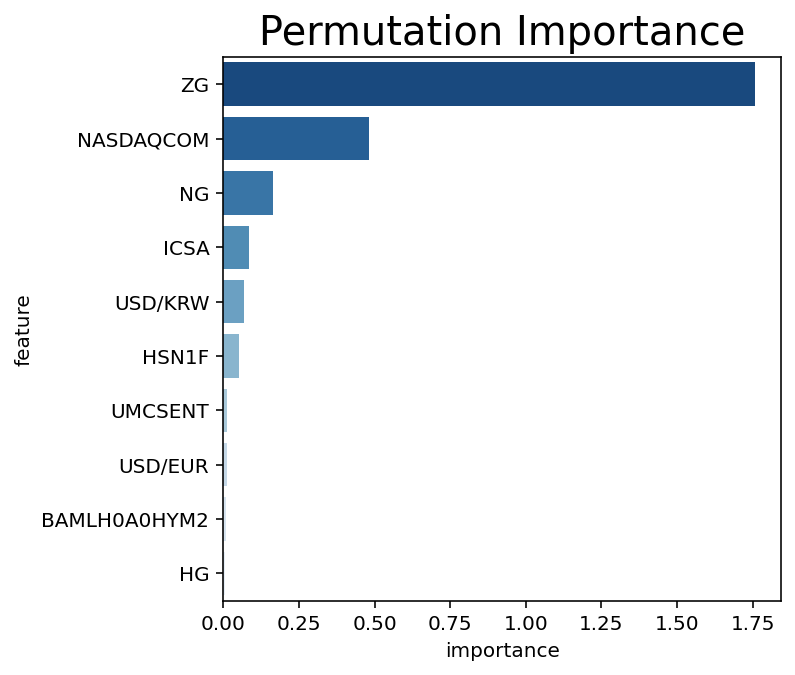

In [219]:
import seaborn as sns
zipp  = []
for zipper in zip(x_train_.columns, permuter.feature_importances_):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(y = zipp.feature[:10], x= zipp.importance[:10], palette='Blues_r')
plt.title("Permutation Importance",fontsize=20);

zg는 금 가격인데 왜 ?  금리 예측에 도움이 되는걸까 ,,,

ZG를 빼도 결과가 너무 좋다

In [222]:
df_x_m2 = df_x_m2.drop("ZI", axis=1)

x_ = df_x_m2.drop('DFEDTAR', axis=1)
y_ = df_x_m2['DFEDTAR']
x_, y_

from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.4, random_state=20, shuffle=True)
x_val_, x_test_, y_val_, y_test_ = train_test_split(x_test_, y_test_, test_size=0.5, random_state=20,shuffle=True)

x_train_.shape, x_test_.shape, x_val_.shape, y_train_.shape, y_test_.shape, y_val_.shape

pipe_ = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=20, n_jobs=-1)) 
])

pipe_.fit(x_train_, y_train_)
print('훈련 R^2: ', pipe_.score(x_train_, y_train_))
print('검증 R^2: ', pipe_.score(x_val_, y_val_))
print('TEST R^2: ', pipe_.score(x_test_, y_test_))

print('\n훈련 MAE: ', mean_absolute_error(pipe_.predict(x_train_), y_train_))
print('검증 MAE: ', mean_absolute_error(pipe_.predict(x_val_), y_val_))
print('TEST MAE: ', mean_absolute_error(pipe_.predict(x_test_), y_test_))

훈련 R^2:  0.9998356901989786
검증 R^2:  0.9956481227418897
TEST R^2:  0.9973068731784086

훈련 MAE:  0.005934574684574683
검증 MAE:  0.018995726495726496
TEST MAE:  0.019023794996949357


In [223]:
# permuter 정의
permuter = PermutationImportance(
    pipe_.named_steps['rf'], # model
    scoring='r2', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=20
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
x_val_transformed = pipe_.named_steps['preprocessing'].transform(x_val_)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(x_val_transformed, y_val_);

feature_names = x_val_.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.5904 ± 0.0446,HSN1F
0.3759 ± 0.0539,USD/KRW
0.3393 ± 0.0281,UMCSENT
0.1916 ± 0.0237,USD/EUR
0.1790 ± 0.0219,NG
0.0824 ± 0.0064,ICSA
0.0103 ± 0.0007,HG
0.0063 ± 0.0005,NASDAQCOM
0.0040 ± 0.0004,BAMLH0A0HYM2


In [ ]:
df_x_m2 = df_x_m2.drop("HSN1F", axis=1)

In [226]:


x_ = df_x_m2.drop('DFEDTAR', axis=1)
y_ = df_x_m2['DFEDTAR']
x_, y_

from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.4, random_state=20, shuffle=True)
x_val_, x_test_, y_val_, y_test_ = train_test_split(x_test_, y_test_, test_size=0.5, random_state=20,shuffle=True)

x_train_.shape, x_test_.shape, x_val_.shape, y_train_.shape, y_test_.shape, y_val_.shape

pipe_ = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=20, n_jobs=-1)) 
])

pipe_.fit(x_train_, y_train_)
print('훈련 R^2: ', pipe_.score(x_train_, y_train_))
print('검증 R^2: ', pipe_.score(x_val_, y_val_))
print('TEST R^2: ', pipe_.score(x_test_, y_test_))

print('\n훈련 MAE: ', mean_absolute_error(pipe_.predict(x_train_), y_train_))
print('검증 MAE: ', mean_absolute_error(pipe_.predict(x_val_), y_val_))
print('TEST MAE: ', mean_absolute_error(pipe_.predict(x_test_), y_test_))

print('\n훈련 MAE: ', mean_squared_error(pipe_.predict(x_train_), y_train_))
print('검증 MAE: ', mean_squared_error(pipe_.predict(x_val_), y_val_))
print('TEST MAE: ', mean_squared_error(pipe_.predict(x_test_), y_test_))

훈련 R^2:  0.9997811585453342
검증 R^2:  0.9958233168920836
TEST R^2:  0.9964944273965559

훈련 MAE:  0.007042124542124543
검증 MAE:  0.02043956043956044
TEST MAE:  0.025167785234899327

훈련 MAE:  0.0008262489824989828
검증 MAE:  0.014813049450549452
TEST MAE:  0.012791496339231235


In [227]:
# permuter 정의
permuter = PermutationImportance(
    pipe_.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=20
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
x_val_transformed = pipe_.named_steps['preprocessing'].transform(x_val_)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(x_val_transformed, y_val_);

feature_names = x_val_.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.6821 ± 0.0437,HG
0.6135 ± 0.0249,USD/KRW
0.4769 ± 0.0252,USD/EUR
0.4263 ± 0.0176,UMCSENT
0.3917 ± 0.0139,NG
0.3871 ± 0.0146,NASDAQCOM
0.1888 ± 0.0089,ICSA
0.0837 ± 0.0110,BAMLH0A0HYM2


원자재 가격이 이렇게 큰 영향을 미친다고 ??



---



In [41]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

In [ ]:
!pip install pdpbox
from pdpbox.pdp import pdp_isolate, pdp_plot

In [44]:
feature = 'DFEDTAR'

In [37]:
!pip install shap

     |████████████████████████████████| 358kB 8.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491627 sha256=084c2c08b760af2ebfcd11192bfd738f2bbe54096291961edfb9f7affd35d353
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [236]:
row = x_test_.iloc[[1]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row

,NASDAQCOM,BAMLH0A0HYM2,UMCSENT,ICSA,NG,HG,USD/KRW,USD/EUR
6031,4997.46,5.13,93.1,292000.0,2.716,2.3805,1134.8,0.9081


In [232]:
y_test_.iloc[[1]]

6031    0.25
Name: DFEDTAR, dtype: float64

In [234]:
# 모델 예측값
pipe_.predict(row)

array([0.2575])

In [213]:
explainer